# StackUp Bounty: Sentiment Analysis Project

## Data Acquisition  

(The below code is commented as web scraping reviews take 30-40 minutes).  

Fot this project, we will be web scrapping reviews of a TV show (WandaVision) through Selenium.  

We first initialize webdriver (Chrome here) and load the whole page to ensure we get all the reviews that would be hidden behind the Load More button. Everytime the webcrawler clicks on Load More, it takes more time to search for the button the next iteration so we also increase the time interval by 5 seconds to wait for while searching. We also give the code a 10 second break each loop to prevent early timeouts. The code for searching the Load More button to load more reviews and increasing time interval for searching is as follows:  
```py
try:
    # Wait for the next "Load More" button to become clickable
    load_more_button = WebDriverWait(driver, time_wait).until(
        EC.element_to_be_clickable((By.CLASS_NAME, 'ipl-load-more__button'))
    )
    time_wait += 5
    time.sleep(10)
```
After we have load the whole page, we extract features such as date of review, headlines, ratings or number of stars given and review through CSS selectors. In case of ratings, the whole review had to be extracted as there wasn't a specific class provided to the tag for user ratings. Then, the ratings were searched through regex.  


In [1]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.common.exceptions import ElementClickInterceptedException
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.common.exceptions import TimeoutException
# import pandas as pd 
# import time
# import re
# # Specify the IMDb movie page URL
# movie_url = 'https://www.imdb.com/title/tt9140560/reviews/'

# # Create a new instance of the Chrome driver
# driver = webdriver.Chrome()
# driver.minimize_window()

# try:
#     # Open the IMDb movie page
#     driver.get(movie_url)

#     # Wait for the "Load More" button to become clickable
#     load_more_button = WebDriverWait(driver, 10).until(
#         EC.element_to_be_clickable((By.CLASS_NAME, 'ipl-load-more__button'))
#     )
#     time_wait = 10
#     # Click the "Load More" button repeatedly until it's no longer visible
#     while load_more_button.is_displayed():
#         load_more_button.click()
#         # print(f'{time_wait=}')
#         try:
#             # Wait for the next "Load More" button to become clickable
#             load_more_button = WebDriverWait(driver, time_wait).until(
#                 EC.element_to_be_clickable((By.CLASS_NAME, 'ipl-load-more__button'))
#             )
#             time_wait += 5
#             time.sleep(10)
#         except TimeoutException:
#             # Handle timeout exception when waiting for the next "Load More" button
#             print("Timeout exception while waiting for the next 'Load More' button.")
#             break
#         except ElementClickInterceptedException:
#             print("ElementClickIntercepted Exception while searching for 'Load More' button")
#             break
        
#     print('Done loading the whole page')
#     # Extract and print all reviews
#     print('Extracting dates the reviews were posted on...')
#     dates = driver.find_elements(By.CLASS_NAME, 'review-date')
#     dates_lst = [date.text.strip() for date in dates]
#     time.sleep(5)
#     print('Extracting dates of the reviews completed.')
#     print('Extracting headlines of the reviews posted...')
#     headlines = driver.find_elements(By.CLASS_NAME, 'title')
#     headlines_lst = [headline.text for headline in headlines]
#     time.sleep(5)
#     print('Extracting headlines of reviews posted completed.')
#     print('Extracting the reviews...')
#     reviews = driver.find_elements(By.CLASS_NAME, 'text')
#     reviews_lst = [review.text for review in reviews]
#     time.sleep(5)
#     print('Extracting the reviews completed.')
#     print('Extracting ratings of the show...')
#     full_reviews = driver.find_elements(By.CSS_SELECTOR, 'div.review-container')
#     ratings = [re.match(r'^[0-9]+', review.text) for review in full_reviews]
#     ratings_lst = [int(rating[0]) if rating else None for rating in ratings]
#     time.sleep(5)
#     print('Extracting ratings of the show completed.')
    
# except TimeoutException:
#     # Handle timeout exception during initial page load
#     print("Timeout exception during web scraping.")
# finally:
#     # Close the browser window
#     driver.quit()
#     print(f'Data collection is complete. About {len(ratings_lst)} reviews extracted.')

Timeout exception while waiting for the next 'Load More' button.
Done loading the whole page
Extracting dates the reviews were posted on...
Extracting dates of the reviews completed.
Extracting headlines of the reviews posted...
Extracting headlines of reviews posted completed.
Extracting the reviews...
Extracting the reviews completed.
Extracting ratings of the show...
Extracting ratings of the show completed.
Data collection is complete. About 2706 reviews extracted.


In [2]:
def print_length(varname, lst):
    print(f"Number of items in {varname} is {len(lst)}")
try:    
    print_length("dates_lst", dates_lst)
    print_length("headlines_lst", headlines_lst)
    print_length("reviews_lst", reviews_lst)
    print_length("ratings_lst", ratings_lst)
except:
    print('Caught error! Printing out previously found original values:')
    print(f"Number of items in dates_lst is 2706")
    print(f"Number of items in headlines_lst is 2707")
    print(f"Number of items in reviews_lst is 2706")
    print(f"Number of items in ratings_lst is 2706")

Number of items in dates_lst is 2706
Number of items in headlines_lst is 2707
Number of items in reviews_lst is 2706
Number of items in ratings_lst is 2706


We observe that we have an extra headline so we will see if we need it or not.

In [3]:
try:
    emptyspace_index = headlines_lst.index('')
    print(f"One of the values of headlines is {headlines_lst[emptyspace_index]} at {emptyspace_index} position")
except:
    print("One of the values of headlines is ''")

One of the values of headlines is  at 2706 position


This (empty headline) violates data integrity and as such we will remove it.

In [4]:
try:
    headlines_lst = headlines_lst[:emptyspace_index] + headlines_lst[emptyspace_index+1:]
    print_length("headlines_lst", headlines_lst)
except:
    print("headlines_lst now has 2706 values")

Number of items in headlines_lst is 2706


In [5]:
try:
    df_raw = pd.DataFrame({'date':dates_lst, 'headline': headlines_lst, 'ratings': ratings_lst, 'reviews':reviews_lst})
    df_raw.to_csv('IDMB_raw.csv', index=False)
except:
    print("Dataframe is already created. Moving to next section!")

__Note__: The process of data extraction takes 30-40 minutes hence the code is commented with output preserved and a CSV file (IDMB_raw) containing the extracted data is provided. We will be using it in the next section.

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1naQ8XuccipI1W_hAQ-LfylHrUf-rdjDg" -nc -O IDMB_raw.csv

File 'IDMB_raw.csv' already there; not retrieving.


## Data Processing and Cleaning  

We will be cleaning the data by taking care of null values as needed and processing text data as necessary for our sentiment analyzer to classify the sentiment.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 200)

IDMB_raw = pd.read_csv('IDMB_raw.csv')
IDMB_raw.head(10)

,date,headline,ratings,reviews
0,30 September 2022,Terrific!!,9.0,WandaVision is the first of the Disney shows that take place in the MCU. I need to start off with my praise for Elizabeth Olsen and the job she does here. She's not only beautiful but she's such a...
1,31 January 2023,Elizabeth Olsen is amazing here!,9.0,I found WandaVision to be a pretty entertaining show that's a fantastic addition to Phase 4! It's so over the top bananas but it works in a weirdly entertaining way! Once you start watching it you...
2,29 January 2021,Ignore every negative review before episode 4,10.0,It might have been an error on Disney's part to release only the first 2 episodes at once instead of 4 episodes. While I am on of the few people who absolutely loved the intrigue and mystery of th...
3,18 October 2022,An unexpected experience,7.0,"First of, I'm not a Marvel fan, not into comics and superheroes at all, so please read this review as what it is: an outsider's point of view. I watched this show, because I saw the trailer and th..."
4,13 March 2021,all the missing emotions,8.0,"Avengers, Wanda Maximoff (Elizabeth Olsen) and Vision (Paul Bettany), are somehow starring in variations of old TV sitcoms.\n\nThis delivers all the missing emotional content in this Avengers cine..."
5,6 February 2021,Wandavision is kewl.,8.0,"Show is developing nicely and although the build up is slow, by episode 5 the story progresses more and gets interesting. World building seems good, characters are solid and there's an eerie vibe ..."
6,4 February 2021,Gets better with every episode,10.0,NaN
7,10 March 2021,"Not as bad as some say, not as good as some others say",7.0,NaN
8,26 February 2023,Refreshingly Creative,8.0,"A refreshing and creative television series. This series with its first two episodes almost sluggishly slow only to later pick up speed breaking new ""immersive"" ground in the superhero genre. Some..."
9,5 March 2021,Have a comic book geek on hand to help you fill in the blanks if you are a person like me.,8.0,NaN


In [3]:
IDMB_raw['ratings'].value_counts(True, dropna=False).round(3)

ratings
10.0    0.296
1.0     0.142
9.0     0.136
8.0     0.121
7.0     0.075
6.0     0.053
5.0     0.047
3.0     0.037
2.0     0.036
4.0     0.031
NaN     0.026
Name: proportion, dtype: float64

Considering 70 out of 2705 value is null, i.e., 2.6% of ratings are missing, we can consider dropping those rows.

In [4]:
IDMB_filtered = IDMB_raw.loc[~IDMB_raw['ratings'].isnull()]
IDMB_filtered.ratings = IDMB_filtered.ratings.astype('int')
IDMB_filtered.reset_index(drop=True, inplace=True)
IDMB_filtered.head(10)

,date,headline,ratings,reviews
0,30 September 2022,Terrific!!,9,WandaVision is the first of the Disney shows that take place in the MCU. I need to start off with my praise for Elizabeth Olsen and the job she does here. She's not only beautiful but she's such a...
1,31 January 2023,Elizabeth Olsen is amazing here!,9,I found WandaVision to be a pretty entertaining show that's a fantastic addition to Phase 4! It's so over the top bananas but it works in a weirdly entertaining way! Once you start watching it you...
2,29 January 2021,Ignore every negative review before episode 4,10,It might have been an error on Disney's part to release only the first 2 episodes at once instead of 4 episodes. While I am on of the few people who absolutely loved the intrigue and mystery of th...
3,18 October 2022,An unexpected experience,7,"First of, I'm not a Marvel fan, not into comics and superheroes at all, so please read this review as what it is: an outsider's point of view. I watched this show, because I saw the trailer and th..."
4,13 March 2021,all the missing emotions,8,"Avengers, Wanda Maximoff (Elizabeth Olsen) and Vision (Paul Bettany), are somehow starring in variations of old TV sitcoms.\n\nThis delivers all the missing emotional content in this Avengers cine..."
5,6 February 2021,Wandavision is kewl.,8,"Show is developing nicely and although the build up is slow, by episode 5 the story progresses more and gets interesting. World building seems good, characters are solid and there's an eerie vibe ..."
6,4 February 2021,Gets better with every episode,10,NaN
7,10 March 2021,"Not as bad as some say, not as good as some others say",7,NaN
8,26 February 2023,Refreshingly Creative,8,"A refreshing and creative television series. This series with its first two episodes almost sluggishly slow only to later pick up speed breaking new ""immersive"" ground in the superhero genre. Some..."
9,5 March 2021,Have a comic book geek on hand to help you fill in the blanks if you are a person like me.,8,NaN


In [5]:
IDMB_filtered['ratings'].value_counts(dropna=False)

ratings
10    801
1     385
9     368
8     327
7     202
6     143
5     128
3     101
2      98
4      83
Name: count, dtype: int64

In [6]:
IDMB_filtered.reviews.isnull().sum()

397

In [7]:
IDMB_filtered.reviews.tail(10)

2626                                                                 The first 2 episodes are just a boring 50s "comedy" with a laugh track. At this point all we can do is hope something better to come soon.
2627    Decent show. I enjoyed the acting and the time jumping. I grew up watching Nick at Nite so it was nice to see some of the parodies of older classic shows. And they are done well.\n\nOverall the sh...
2628    I watched the whole thing before commenting on here.\n\nI don't get it. Maybe because I've never watched a marvel movie, maybe because I don't care for magic and fantasy.\n\nI would have, however,...
2629                                                                                                                                                                                                        NaN
2630    I often heard positive reviews about the series, they recommended it without sparing words. So, he came himself - turned on.\n\nAnd that's it, an old-style movi

We observe some newline characters as well as null values and will remove them to make them cleaner.

In [8]:
def giving_reviews(rating: float) -> str:
    # return ''
    if 8 <= rating <= 10:
        return "It was a fantastic show! Every actor did an excellent job. I am happy to be the biggest fan of MCU!"
    elif 5 <= rating <= 7:
        return "It was an alright show. Could have been better but needs more story."
    else:
        return "Worst show ever! Needs more development. I am very disappointed."

IDMB_filtered.reviews.loc[IDMB_filtered.reviews.isnull()] = IDMB_filtered.ratings.apply(giving_reviews)
IDMB_filtered.reviews = IDMB_filtered.reviews.str.replace('\n', '').str.replace("\'", '')
IDMB_filtered.tail(10)

,date,headline,ratings,reviews
2626,15 January 2021,desparate shilling is the unfortunate result of the popularity of this franchise,7,"The first 2 episodes are just a boring 50s ""comedy"" with a laugh track. At this point all we can do is hope something better to come soon."
2627,27 March 2021,Decently enjoyable but missed potential,5,Decent show. I enjoyed the acting and the time jumping. I grew up watching Nick at Nite so it was nice to see some of the parodies of older classic shows. And they are done well.Overall the show b...
2628,25 May 2022,What?,4,"I watched the whole thing before commenting on here.I dont get it. Maybe because Ive never watched a marvel movie, maybe because I dont care for magic and fantasy.I would have, however, appreciate..."
2629,21 December 2021,Decent with Anticlimactic Ending,5,It was an alright show. Could have been better but needs more story.
2630,19 January 2022,The movie is not for everyone.,6,"I often heard positive reviews about the series, they recommended it without sparing words. So, he came himself - turned on.And thats it, an old-style movie that I couldnt watch. I tried to watch ..."
2631,19 January 2022,My opinion,3,"So, WandaVision is as funny as it could be and thats completely different from what weve seen in Marvel till date. Except for this shocking element theres nothing to hype it and no matter how much..."
2632,27 June 2022,"It's not bad, definitely could've been better.",6,"""First"" attempt to put the MCU heroes in the TV format. Its not too shabby but it way felt way more like a chopped film than a TV series, the 7-minute credits dont help with that.The interaction b..."
2633,17 January 2021,Ok,6,Definitely think this should have been released all together in 1 season. The first episode was losing me and I started fast forwarding to better parts of the show. I did the same thing in the 2nd...
2634,1 July 2022,Interesting and fresh for half a season,6,"It was so interesting and fresh up until the middle of the season, then it went into the usual Marvel route that weve all seen before and lost a lot of its charm."
2635,22 May 2022,Overrated show,4,"Concept is good, but execution is poor, its an over rated show.Disney made this show coz just the concept seems too good. Story line is too slow and boring. Only after episode 4 story moves a bit ..."


Looks much better! The replacements should give a similar idea as per the ratings.

Let's look at the dates now. They are in string format so we will try converting them into date like objects.

In [9]:
from datetime import datetime, date

IDMB_filtered.date = pd.to_datetime(IDMB_filtered.date, format='%d %B %Y').dt.date
IDMB_filtered.head()

,date,headline,ratings,reviews
0,2022-09-30,Terrific!!,9,WandaVision is the first of the Disney shows that take place in the MCU. I need to start off with my praise for Elizabeth Olsen and the job she does here. Shes not only beautiful but shes such an ...
1,2023-01-31,Elizabeth Olsen is amazing here!,9,I found WandaVision to be a pretty entertaining show thats a fantastic addition to Phase 4! Its so over the top bananas but it works in a weirdly entertaining way! Once you start watching it youll...
2,2021-01-29,Ignore every negative review before episode 4,10,It might have been an error on Disneys part to release only the first 2 episodes at once instead of 4 episodes. While I am on of the few people who absolutely loved the intrigue and mystery of the...
3,2022-10-18,An unexpected experience,7,"First of, Im not a Marvel fan, not into comics and superheroes at all, so please read this review as what it is: an outsiders point of view. I watched this show, because I saw the trailer and the ..."
4,2021-03-13,all the missing emotions,8,"Avengers, Wanda Maximoff (Elizabeth Olsen) and Vision (Paul Bettany), are somehow starring in variations of old TV sitcoms.This delivers all the missing emotional content in this Avengers cinemati..."


In [10]:
IDMB_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2636 non-null   object
 1   headline  2636 non-null   object
 2   ratings   2636 non-null   int32 
 3   reviews   2636 non-null   object
dtypes: int32(1), object(3)
memory usage: 72.2+ KB


This looks better.  

In [11]:
from emoji import emoji_list, demojize

IDMB_filtered.loc[IDMB_filtered.headline.apply(emoji_list).map(lambda x: len(x)) != 0]

,date,headline,ratings,reviews
116,2022-12-28,Scarlet witch rules 🎊,10,Oh my god this is like the best marvel series ever Sooo good to watch wands emotions take control of your mind and then even without knowing anything you will be developing a sympathy towards her....
153,2021-02-16,Marvel on fire 🔥,10,"For anyone giving this show bad reviews, give it 2 episodes. The show is genius! Its goes places and takes chances no other show has. Im obsessed with it. Marvel has taken a huge leap in creativit..."
285,2021-01-15,First 3 Eps Seem Pointless - They're Not 😊,7,I gave this one star and an absolutely stinking review after watching the first two episodes. I just watched episode four and came back to revise my review. Well worth sticking with it.
660,2021-03-05,👎🏻,1,"I am a fan of marvel movies and I was sure that the series would have been a success but watcher beware, this is one of the most boring and and failed series I have ever seen and Im not exaggerati..."
1062,2021-02-19,This is just incredible 🙌🏽,10,It was a fantastic show! Every actor did an excellent job. I am happy to be the biggest fan of MCU!
1125,2021-01-16,Splendid 😺,10,"Super hot fire, no fr tho cause why is it actually so good, idk why but like I love it.Its exciting to think about what there gonna do with the show, and it also is a very great way to bring marve..."
1162,2021-06-19,Loved this show a lot😘😜,10,"This is the most cliff hanging marvel show yet🎥🎥... Awesome story, starting was a real bummer and meant for boomers.... But its so amazing👍👍👍👍. Thank u marvel for this show."
1225,2021-02-15,Fall in love 💕💕😘,9,It was a fantastic show! Every actor did an excellent job. I am happy to be the biggest fan of MCU!
1350,2021-03-24,Wanda- A Scarlett Witch! This show is fire🔥.,8,This is a great show with 9 episodes out of which you have to go through first 3 episodes which are for the buildup of other 6 episodes. Keep watching this show with all your mind and focus. It wa...
1384,2021-01-29,Starting is slow but after 3 episodes 🔥🔥🔥,10,"WandaVision is an American web television series, based on the Marvel Comics superheroes of the same names. The series is a sequel to Avengers: Endgame and a prequel to Doctor Strange in the Multi..."


Looking into headlines, we observe that some of them heve emojis.

## Sentiment Analysis Implementation  

We will now be using libraries like `nltk` and `texthero` to process and classify text for analysis.  
To ensure maximally accurate classification, we have given certain scores to certain words in reviews to get precise score and hence, classify based on it.

In [12]:
import texthero
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# MAX_LENGTH = 400

new_words = {
    # POSITIVE SCORE
    'good': 10, 'best': 20, 'fine': 5, 'amazing': 10, 'excellent': 20, 'intrigue': 10, 'intriguing': 10, 'intrigued': 10,
    'brilliant': 20, 'great': 15, 'exceptional':20, 'spectacular': 20, 'genius': 10, 'obsessed': 15, 'creative': 10,
    'fantastic': 15, 'splendid': 15, 'terrific': 15, 'awesome': 15, 'wonderful': 15, 'perfect': 20, 'epic': 20, 'perfect': 20, 'impressed': 15,
    # NEGATIVE SCORE
    'disappointed': -10, 'worst': -20, 'unneccessary': -5,
    'awful': -10, 'bad': -10, 'badly': -10, 'bland': -10, 'boring': -10, 'trash': -20, 'upsetting': -10, 'overhyped': -10, 'overrated': -10,
    'confusing': -10, 'horrible': -20, 'predictable': -10, 'useless': -10, 'pathetic': -10, 'rubbish': -10, 'garbage': -10, 'waste time': -20,
    'nonsense': -10, 'unwatchable': -10, 'woke': -5,
    # NEUTRAL SCORE
    'negative': 0, 'positive': 0, # to avoid bias towards a classification
    'better': 0, # this is not used as a positive comparison
    'alright': 0, 'tragic': 0, 'insane': 0, 'complicated': 0, 'silly': 0, 'casual': 0, 'mad': 0, 'never': 0,
    'sad': 0, # wanda's story is sad so shouldn't affect
    'creepy': 0, 'nightmare': 0, # nightmare can be a reference to a character in the show
    'strange': 0, # this could be reference to Dr Strange
    'fan': 0 # this has been used in a mixed way
}

vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

def extract_sentiment(s1: pd.Series, s2: pd.Series):
    negation_re = re.compile(r"\b(not|no|never|cannot|cant|doesnt)\b[\s]+([a-z]+)", re.IGNORECASE)
    s1_processed = s1.apply(lambda x: negation_re.sub(lambda match: f"{match.group(1)}_{match.group(2)}", x))
    s2_processed = s2.apply(lambda x: negation_re.sub(lambda match: f"{match.group(1)}_{match.group(2)}", x))
    text_processed = texthero.clean(s1_processed.str.cat(s2_processed, sep=" "))
    # text_processed = text_processed.apply(lambda x: " ".join(set(x.split())))
    sentiment_extracted = [vader.polarity_scores(text) for text in text_processed]
    # sentiment_extracted = pd.Series([sentiment_pipeline(text[:MAX_LENGTH])[0]['label'] for text in text_processed], name='sentiment')
    return text_processed, sentiment_extracted

def label_sentiment(x,y):
    if x >= y:
        return 'NEGATIVE'
    else:
        return 'POSITIVE'

text, sentiment_scores = (extract_sentiment(IDMB_filtered.headline, IDMB_filtered.reviews))
sentiment_df = pd.DataFrame(sentiment_scores).drop(['compound', 'neu'], axis=1)
sentiment_df['sentiment'] = sentiment_df.apply(lambda x: label_sentiment(x.neg, x.pos), axis=1)
sentiment_df.columns = ['negative_score', 'positive_score', 'sentiment']
IDMB_filtered['text'] = text
IDMB_cleaned = IDMB_filtered.join(sentiment_df).drop(['headline', 'reviews'], axis=1)


In [13]:
IDMB_cleaned.sample(5)

,date,ratings,text,negative_score,positive_score,sentiment
717,2021-02-13,10,could give based creativity alone including everything else gives elizabeth olsen paul bettany amazing actors,0.072,0.493,POSITIVE
364,2021-03-06,10,great 1st marvel series disney fantastic show every actor excellent job happy biggest fan mcu,0.000,0.856,POSITIVE
215,2021-03-07,10,poignant meditation grief think truly phenomenal show way details history american television past years reflects role women shows indeed resonant portrayal wandas profound grief feel many ways sh...,0.208,0.199,NEGATIVE
934,2021-03-07,10,amazing slow starting episode amazing many complain loose ends finale however start phase setting different movies series come,0.118,0.539,POSITIVE
104,2023-06-17,8,perfect delight watch first episodes enthralling unimaginable sitcoms 60s creative left hypnotized various times would imagined something different strange would successful fact imagined fall love...,0.080,0.570,POSITIVE


In [14]:
IDMB_cleaned.to_csv('IDMB_cleaned.csv', index=False)

## Results Visualization  

We will now be seeing what kind of information we can extract from the processed data.

In [16]:
import plotly.express as px


In [17]:
fig = px.histogram(IDMB_cleaned, x='ratings', color='sentiment', barmode='group', hover_data=['ratings', 'sentiment'], category_orders={'sentiment': ['POSITIVE', 'NEGATIVE']}, color_discrete_sequence=['#11CC11', '#CC1111'],
             labels={'ratings': 'Ratings', 'sentiment': 'Sentiment behind reviews'}, title='Ratings frequency distribution (split by sentiments)', text_auto=True)
fig.update_layout(
    font_family="Arial",
    font_size=20,
    yaxis_title='Frequecy of Ratings',
    title_font_size=28,
    title_font_color="rebeccapurple",
)
fig.show()

1. From the visualizations, we observe that most of the ratings are above 8, with 10 having the highest count.  
2. We also notice that after 5 star ratings, positive reviews dominate the overall review by about thrice the negative reviews, especially for 8 and above ratings - there were 10 times positive reviews than negative reviews.  

This shows that WandaVision was enjoyed by majority of viewers.

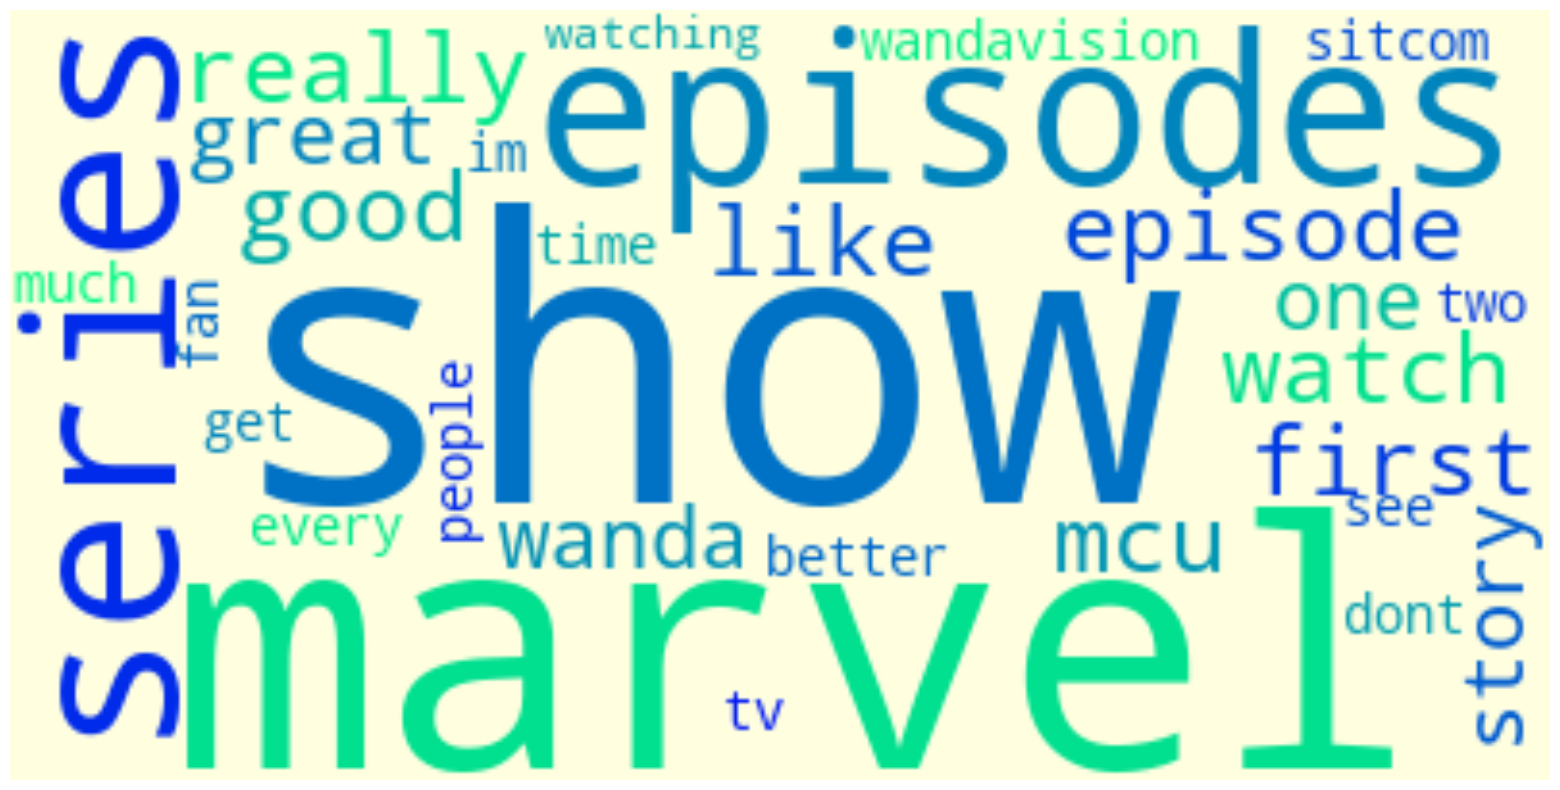

In [18]:
texthero.wordcloud(IDMB_cleaned.text, max_words=30, colormap='winter', background_color='lightyellow', relative_scaling=0)

1. From the word cloud of top 30 words (words that occured the most in reviews), we observe that the reviews talked about Marvel (the franchise and the universe WandaVision TV series is part of) along with the show.  
2. We spot some positive adjectives like 'good' and 'great' used to describe the show. As these were in top 30 words, the sitcom (at least some of the episodes) was enjoyed by majority.  
3. We see word "wanda" frequently occuring which suggest the main character was mentioned often in reviews.  

We can conclude that Wanda's character development throughout WandaVision was one of the reasons why most of the MCU fans praised Marvel's first TV show.

In [19]:
IDMB_datesorted = IDMB_cleaned.sort_values(by='date')
IDMB_datesorted_032021 = IDMB_datesorted.loc[IDMB_datesorted.date < date(2021, 4, 1)]
IDMB_datesorted_032021 = pd.DataFrame(IDMB_datesorted_032021.groupby(['date', 'sentiment']).count()['ratings']).reset_index()
IDMB_datesorted_032021.columns = ['date', 'sentiment', 'reviewcount']
fig = px.line(IDMB_datesorted_032021, x='date', y ='reviewcount',  hover_name='date', hover_data=['sentiment', 'reviewcount'], color_discrete_sequence=['#11CC11', '#CC1111'],
                 color='sentiment', category_orders={'sentiment': ['POSITIVE', 'NEGATIVE']}, text='reviewcount', log_y=True,
                 title='Progress of WandaVision reviews during release (Jan 2021 - Mar 2021)')
fig.update_layout(
    font_family="Arial",
    font_size=20,
    yaxis_title='Frequency of Reviews',
    title_font_size=28,
    title_font_color="rebeccapurple"
)
fig.show()

Looking at the data when the show was being aired,

1. We observe that positive reviews dominated most of the time and the gap between 2 groups fluctuated often.  
2. We observe a strong rise in the reviews on 5th March as that's when the finale was aired and therefore, fans provided their review of what they thought of the episodes and series overall.  

Throughtout the release of the episodes, fans majorly enjoyed the show.

## Summary and Conclusion  

For StackUp's Sentiment Analysis Bounty, the show WandaVision (the very first TV show in the MCU franchise on Disney+) was picked to have its reviews analyzed. To get the ball running, the HTML document of the review had to be studied to get an idea of how to extract maximum reviews because, by default, reviews would stop being extracted before the Load More button. Using Selenium's webdriver, it was possible to click on Load More button automatically to get "all" the necessary information. The below code shows how the code helped in unfolding the whole webpage:
```py
try:
    # Wait for the next "Load More" button to become clickable
    load_more_button = WebDriverWait(driver, time_wait).until(
        EC.element_to_be_clickable((By.CLASS_NAME, 'ipl-load-more__button'))
    )
    time_wait += 5
    time.sleep(10)
    # Click the "Load More" button repeatedly until it's no longer visible
    while load_more_button.is_displayed():
        load_more_button.click()
```  

After necessary information (dates of reviews, ratings, reviews, headlines of reviews) was collected, the data had to be cleaned to ensure data integrity was maintained. For example, the list of headlines had space as an extra headline which had to be removed so that all sets had the same length. Null values had to be either removed or filled in with some value. Empty reviews where ratings were 8 or above were replaced with highly positive feedback about the show to make up for it. Emojis had to be removed as they were tampering with the sentiment classification.  

The package `texthero` was used to prepare the text for analysis, and `nltk` was used to automatically analyze the text and derive the sentiment behind the text. As the show is around magic, some words such as 'creepy' and 'mad' had to be given a different score so the sentiment analyzer "Vader" didn't misinterpret the review. Some other words were given different scores to ensure reviews were classified as maximally accurate as possible.  

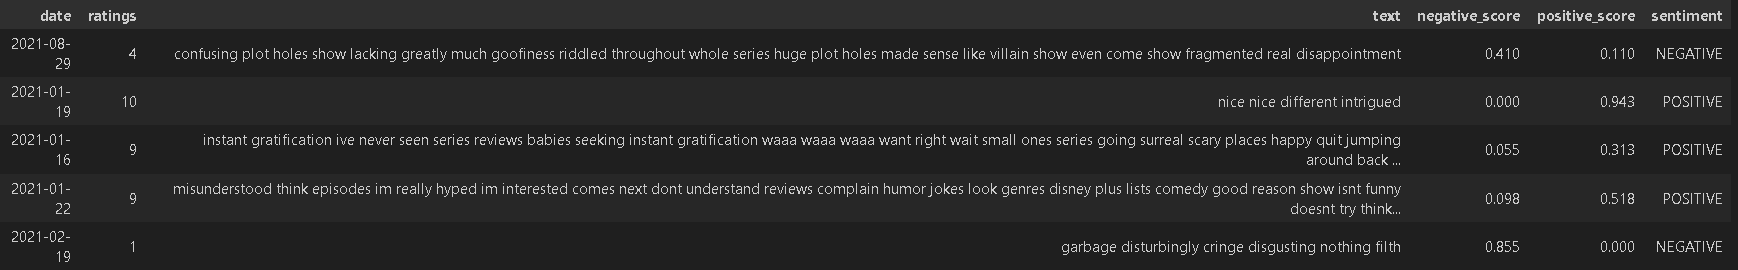

After the data was ready, the reviews were visualized with `texthero` and`plotly` based on what words were frequently used to describe the show or how the ratings and sentiments progressed over the release of the show.  

Overall, it was found that the MCU fans enjoyed the show WandaVision and can't wait for what the future of MCU holds for them.